In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["ChestPainType"] = le.fit_transform(df["ChestPainType"])
df["RestingECG"] = le.fit_transform(df["RestingECG"])
df["ExerciseAngina"] = le.fit_transform(df["ExerciseAngina"])
df["ST_Slope"] = le.fit_transform(df["ST_Slope"])
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0


In [5]:
#categorical = df[['Sex']]
#ohe = OneHotEncoder()
#ohe.fit_transform(categorical)

In [6]:
# Ordinal Assumption - Ordinality Bias
# Safe-Pick -> OneHotEncoding (sırasız)
# Eğer doğal bir sıra yoksa OneHotEncoding daha uygun, sıra var ise LabelEncoder OrdinalEncoder kullanılabilir
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop("HeartDisease", axis=1)
y = df["HeartDisease"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.842391304347826

In [16]:
cm = confusion_matrix(y_test, y_pred) # Modelin doğru ve yanlış tahminlerini sınıf bazında gösterir.

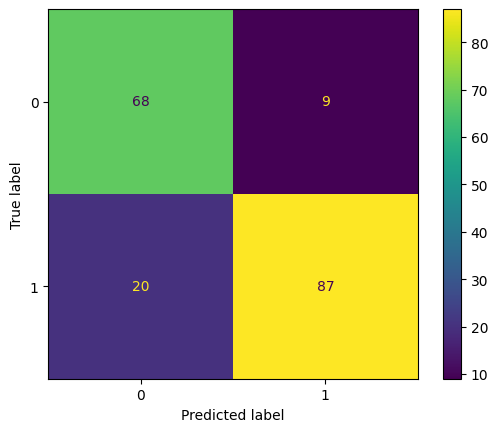

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

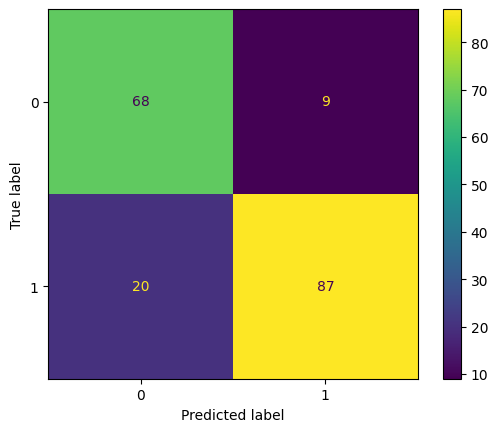

In [22]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [23]:
# Yeni Bir Hasta Geldi

new_patient = [[55, 1, 2, 140, 240, 0, 1, 150, 0, 0, 2]]
sample = pd.DataFrame(new_patient, columns=X_train.columns)
model.predict(sample)

array([0], dtype=int64)